In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\gopik\OneDrive\Desktop\upgrad\projects\mc Donalds\Nutrical Dataset.csv")
print(df.head())  # Inspect the first few rows
print(df.info())  # Check for data types and missing values

    Category                              Item  Serving Size(oz)  \
0  Breakfast                      Egg McMuffin               4.8   
1  Breakfast                 Egg White Delight               4.8   
2  Breakfast                  Sausage McMuffin               3.9   
3  Breakfast         Sausage McMuffin with Egg               5.7   
4  Breakfast  Sausage McMuffin with Egg Whites               5.7   

   Serving Size(g)  Calories  Calories from Fat  Total Fat  \
0            136.0       300                120       13.0   
1            135.0       250                 70        8.0   
2            111.0       370                200       23.0   
3            161.0       450                250       28.0   
4            161.0       400                210       23.0   

   Total Fat (% Daily Value)  Saturated Fat  Saturated Fat (% Daily Value)  \
0                         20            5.0                             25   
1                         12            3.0                   

In [5]:
print(df.isnull().sum())  # Check for missing values


Category                           0
Item                               0
Serving Size(oz)                   0
Serving Size(g)                  140
Calories                           0
Calories from Fat                  0
Total Fat                          0
Total Fat (% Daily Value)          0
Saturated Fat                      0
Saturated Fat (% Daily Value)      0
Trans Fat                          0
Cholesterol                        0
Cholesterol (% Daily Value)        0
Sodium                             0
Sodium (% Daily Value)             0
Carbohydrates                      0
Carbohydrates (% Daily Value)      0
Dietary Fiber                      0
Dietary Fiber (% Daily Value)      0
Sugars                             0
Protein                            0
Vitamin A (% Daily Value)          0
Vitamin C (% Daily Value)          0
Calcium (% Daily Value)            0
Iron (% Daily Value)               0
dtype: int64


In [11]:
df.drop_duplicates(inplace=True)


In [13]:
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')


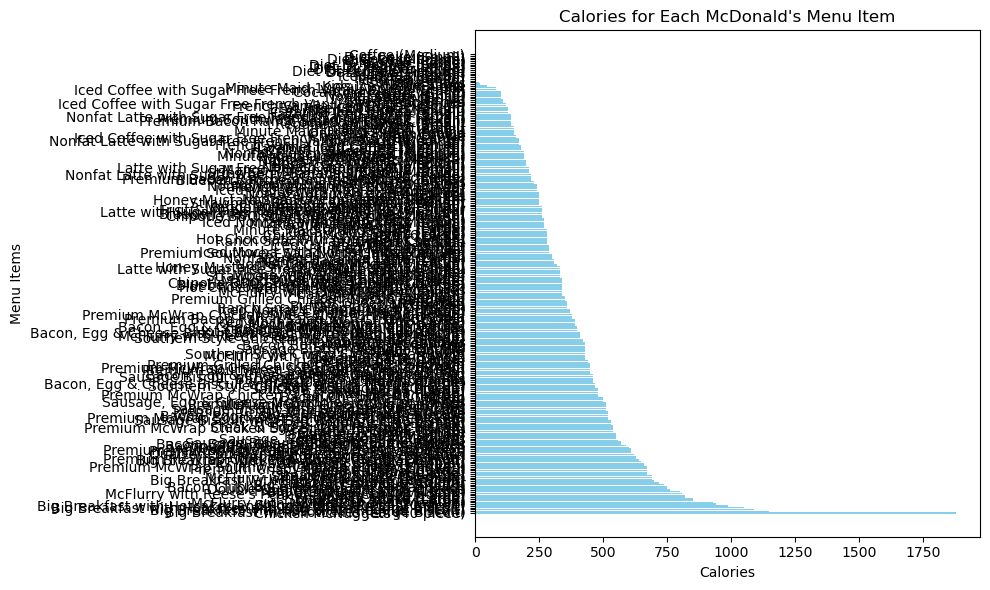

In [27]:
import matplotlib.pyplot as plt

# Sort the dataframe by 'Calories' to keep the chart organized
df_sorted = df.sort_values('Calories', ascending=False)

# Plot bar chart
plt.figure(figsize=(10,6))
plt.barh(df_sorted['Item'], df_sorted['Calories'], color='skyblue')
plt.title('Calories for Each McDonald\'s Menu Item')
plt.xlabel('Calories')
plt.ylabel('Menu Items')

# Show the chart
plt.tight_layout()
plt.show()

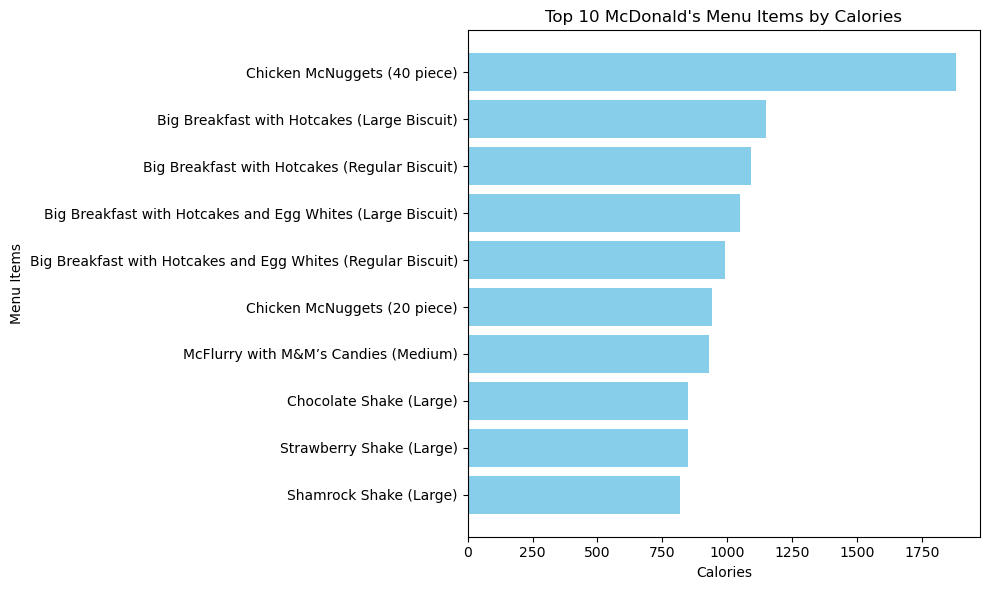

In [29]:
import matplotlib.pyplot as plt

# Sort the dataframe by 'Calories' and get the top 10 items
df_top10 = df.sort_values('Calories', ascending=False).head(10)

# Plot a horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(df_top10['Item'], df_top10['Calories'], color='skyblue')
plt.title('Top 10 McDonald\'s Menu Items by Calories')
plt.xlabel('Calories')
plt.ylabel('Menu Items')

# Invert the Y-axis to have the highest calorie item at the top
plt.gca().invert_yaxis()

# Show the chart
plt.tight_layout()
plt.show()


In [31]:
# Display summary statistics for the nutritional columns
nutritional_columns = ['Total Fat', 'Saturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein']
df[nutritional_columns].describe()


,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,14.165385,6.007692,0.203846,54.942308,495.750000,47.346154,1.630769,29.423077,13.338462
std,14.205998,5.321873,0.429133,87.269257,577.026323,28.252232,1.567717,28.679797,11.426146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.375000,1.000000,0.000000,5.000000,107.500000,30.000000,0.000000,5.750000,4.000000
50%,11.000000,5.000000,0.000000,35.000000,190.000000,44.000000,1.000000,17.500000,12.000000
75%,22.250000,10.000000,0.000000,65.000000,865.000000,60.000000,3.000000,48.000000,19.000000
max,118.000000,20.000000,2.500000,575.000000,3600.000000,141.000000,7.000000,128.000000,87.000000


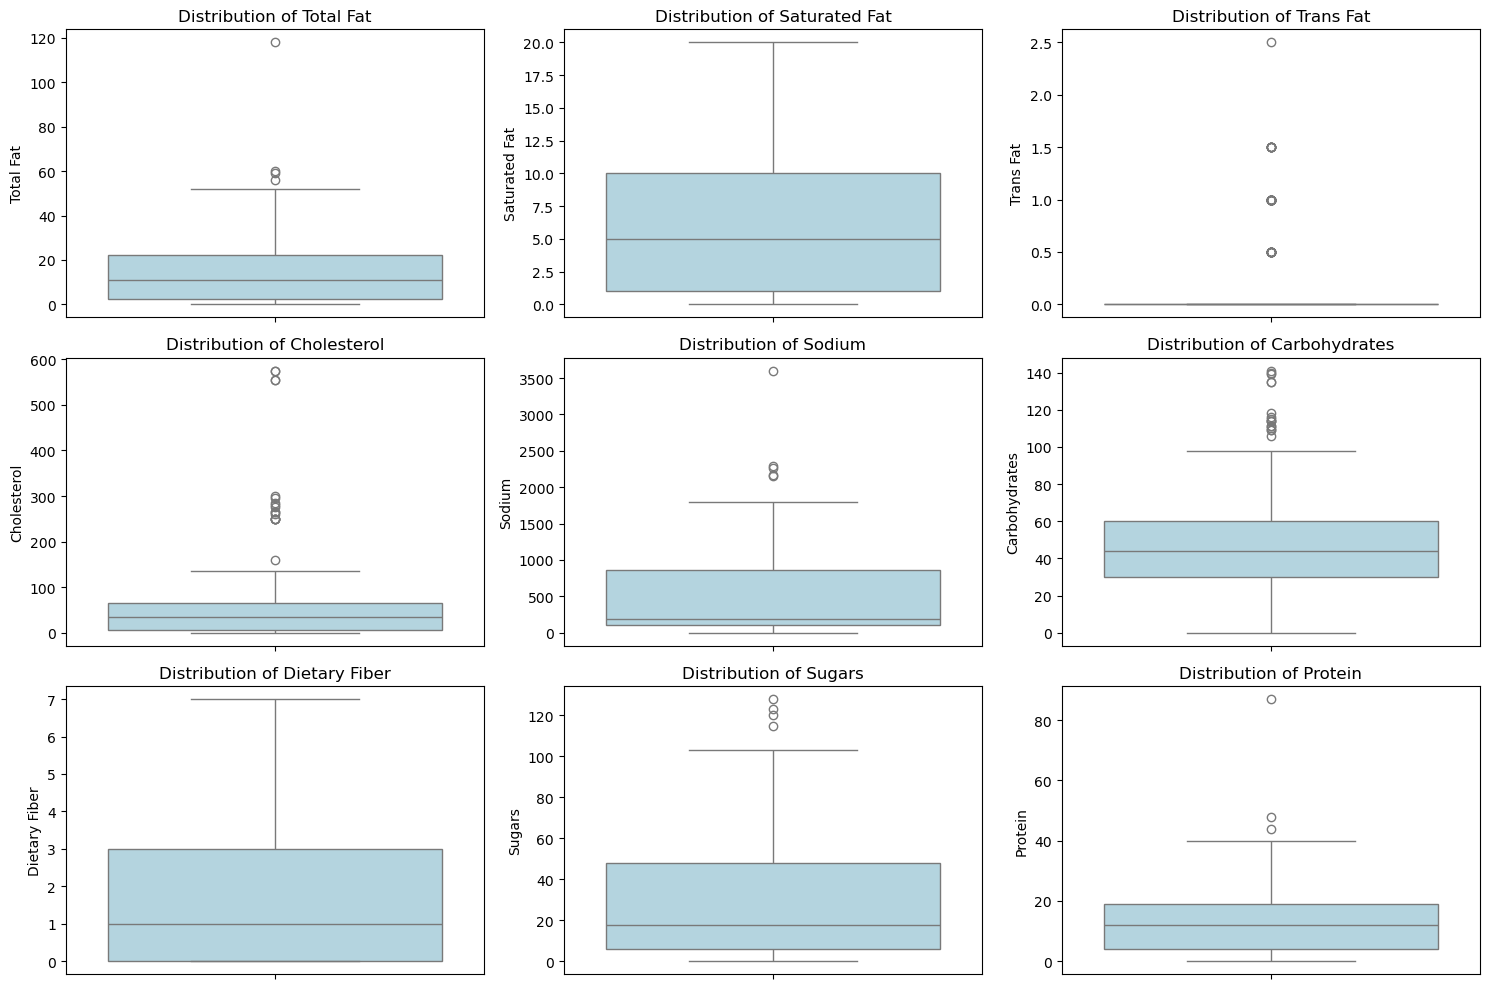

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(15,10))

# Loop through each nutritional column and plot a boxplot
for i, nutrient in enumerate(nutritional_columns, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    sns.boxplot(data=df, y=nutrient, color='lightblue')
    plt.title(f'Distribution of {nutrient}')

plt.tight_layout()
plt.show()


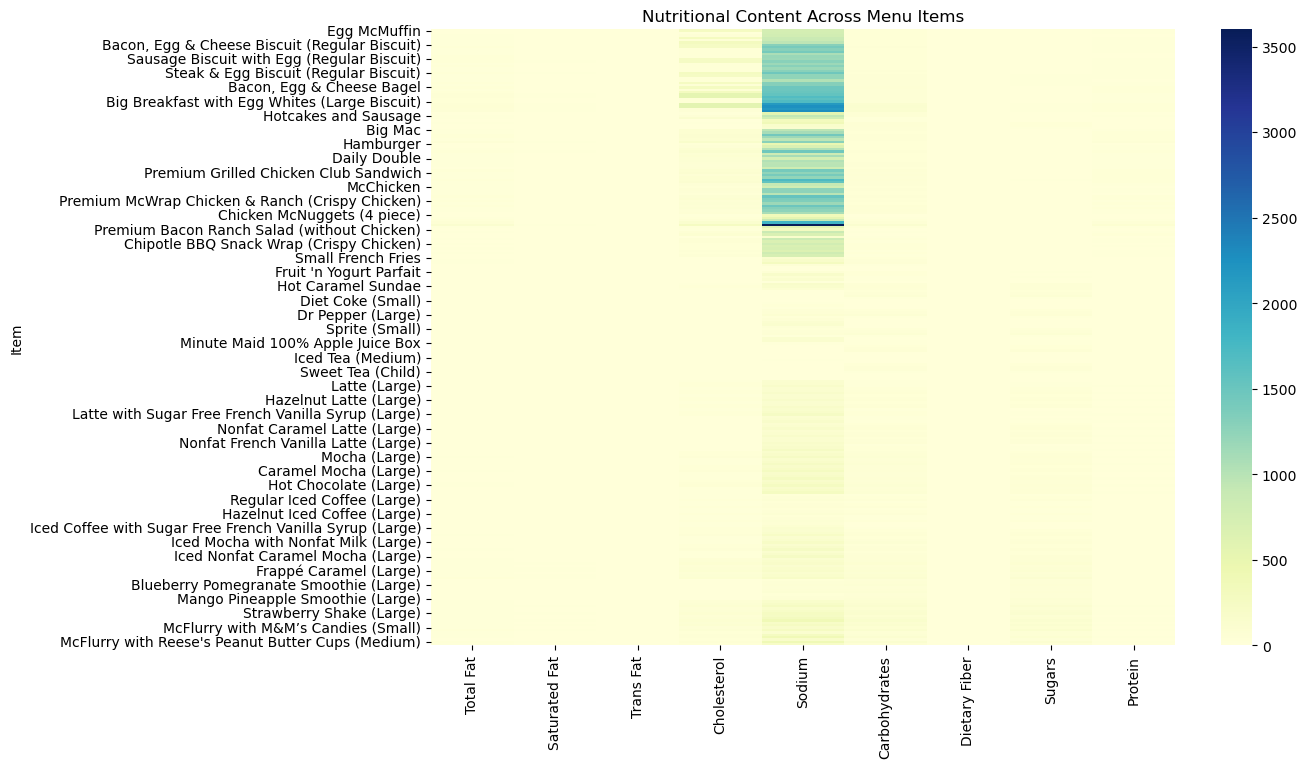

In [35]:
# Select relevant nutritional columns and normalize data for visualization purposes
df_nutrition = df[['Item'] + nutritional_columns].set_index('Item')

# Plot a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_nutrition, cmap="YlGnBu", annot=False, cbar=True)
plt.title('Nutritional Content Across Menu Items')
plt.show()


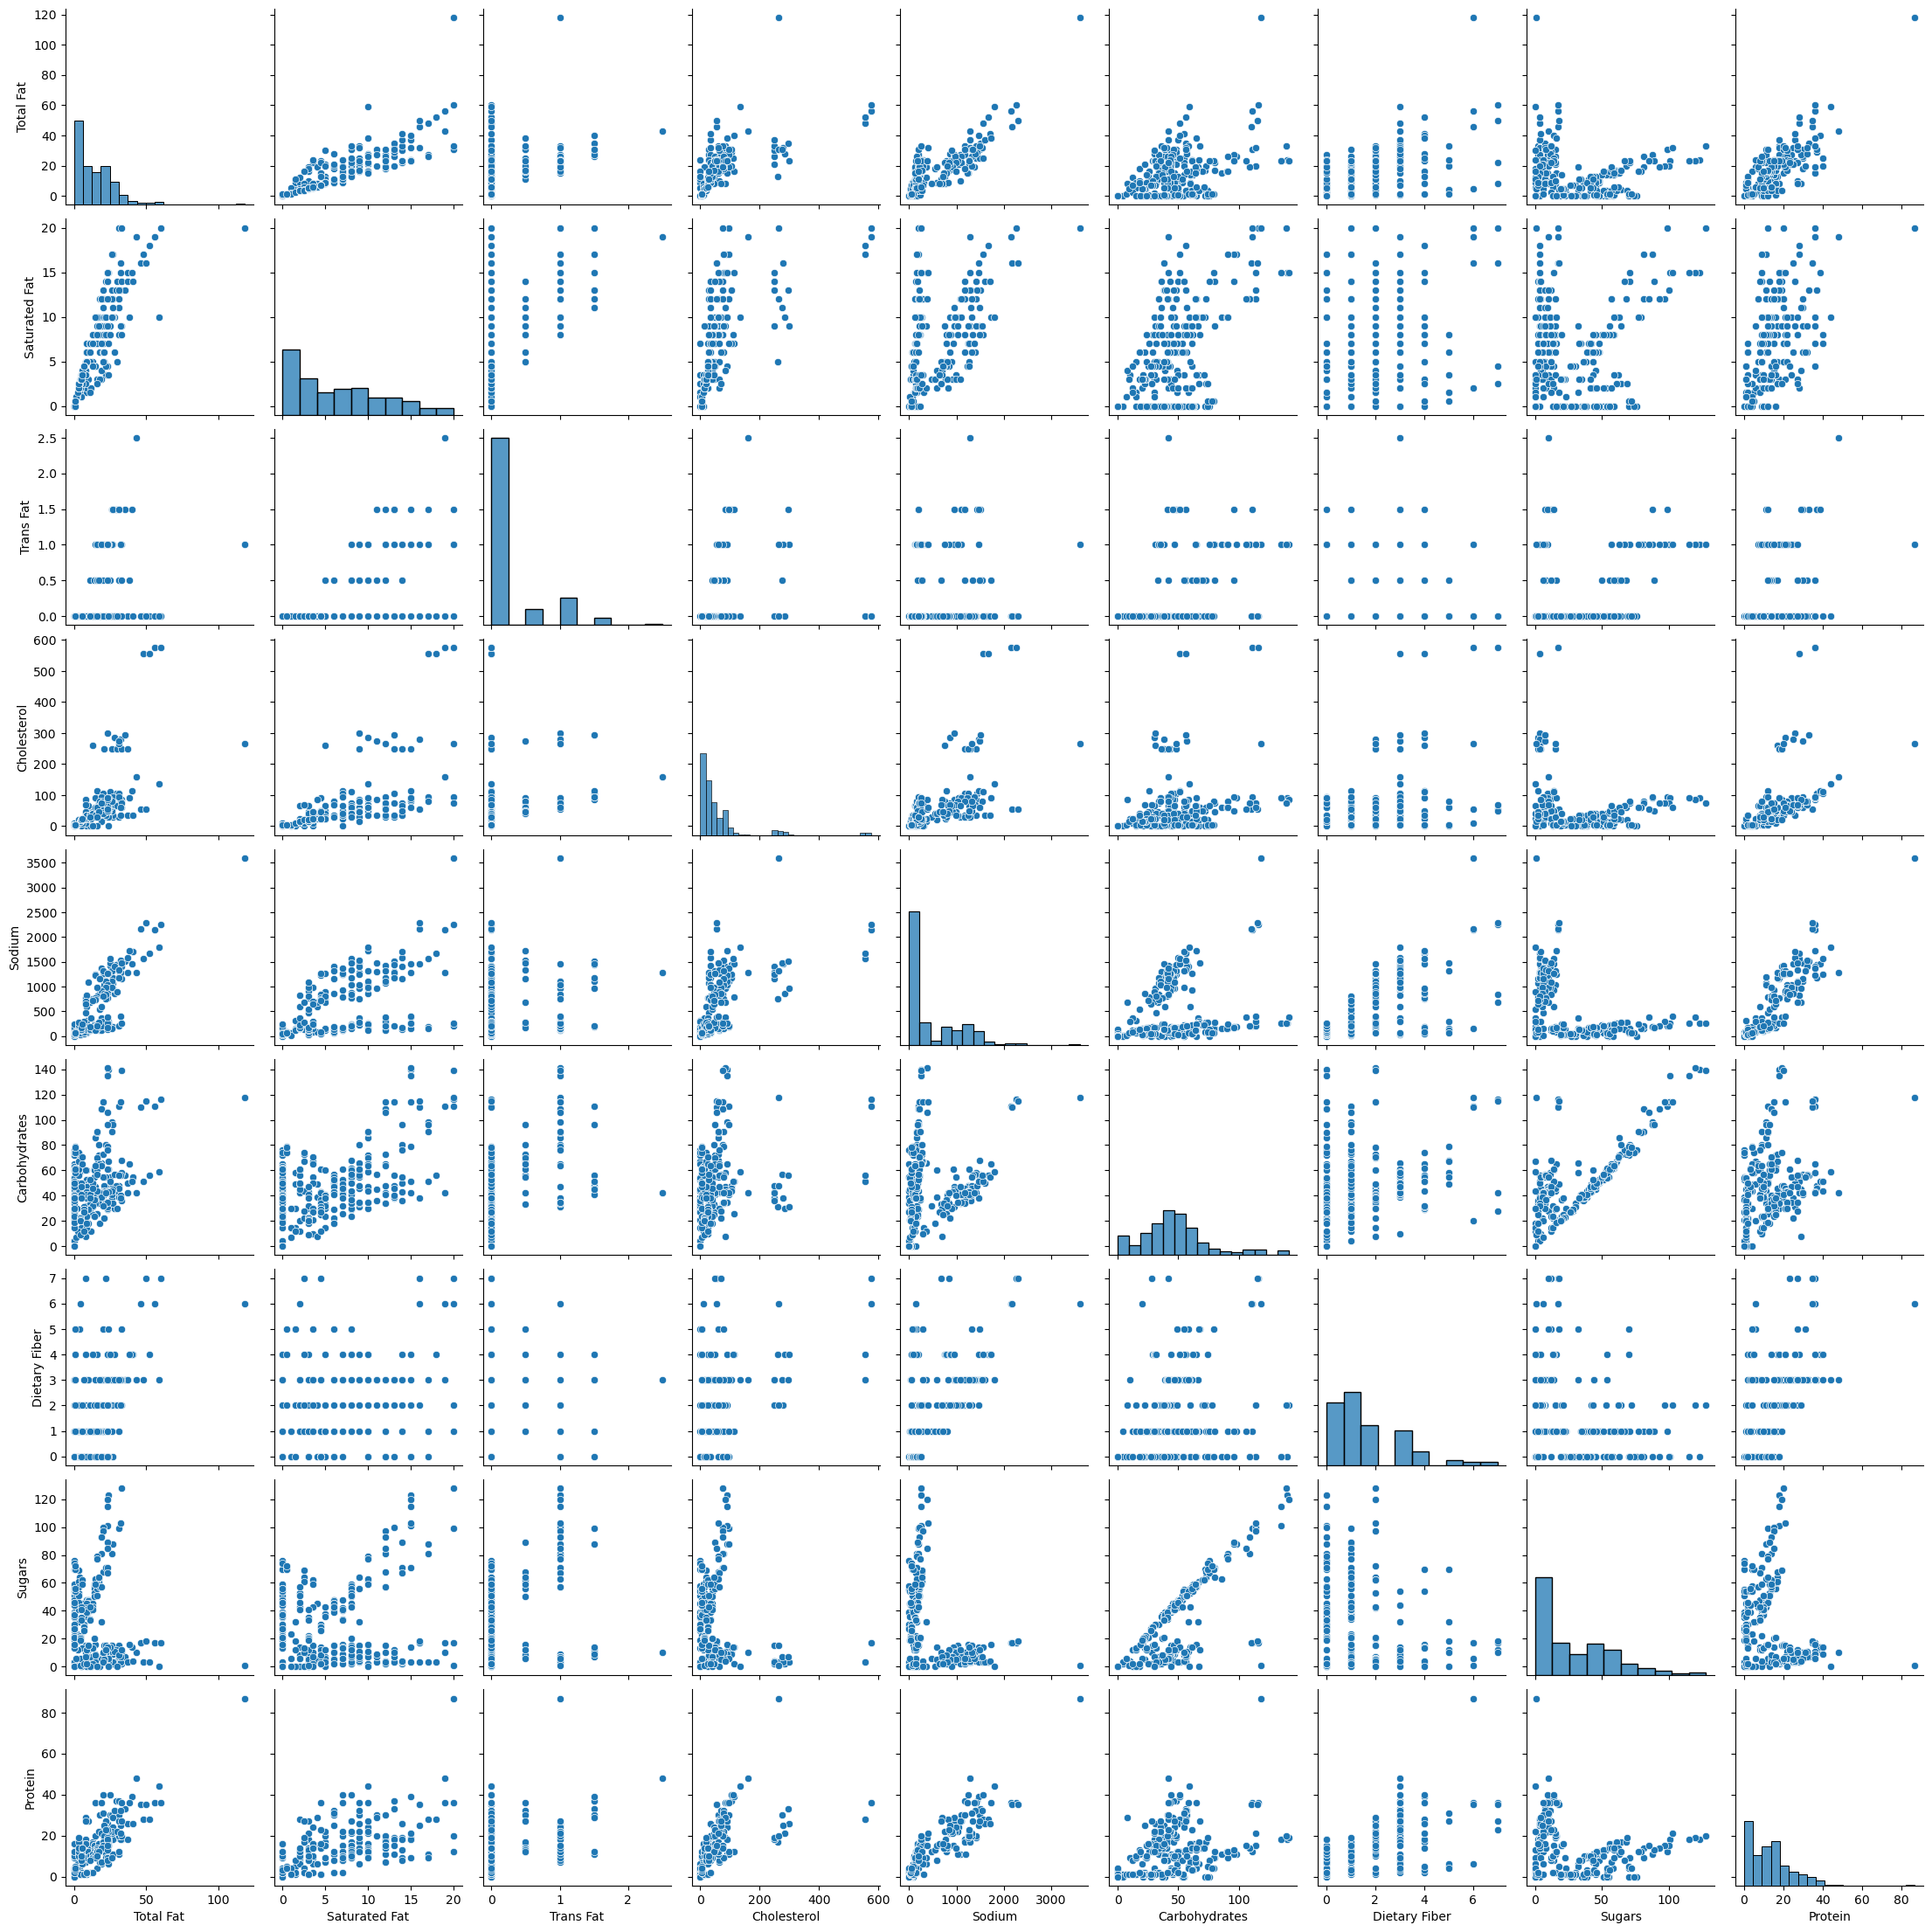

In [37]:
# Create pairplot for nutritional content
sns.pairplot(df[nutritional_columns])
plt.show()


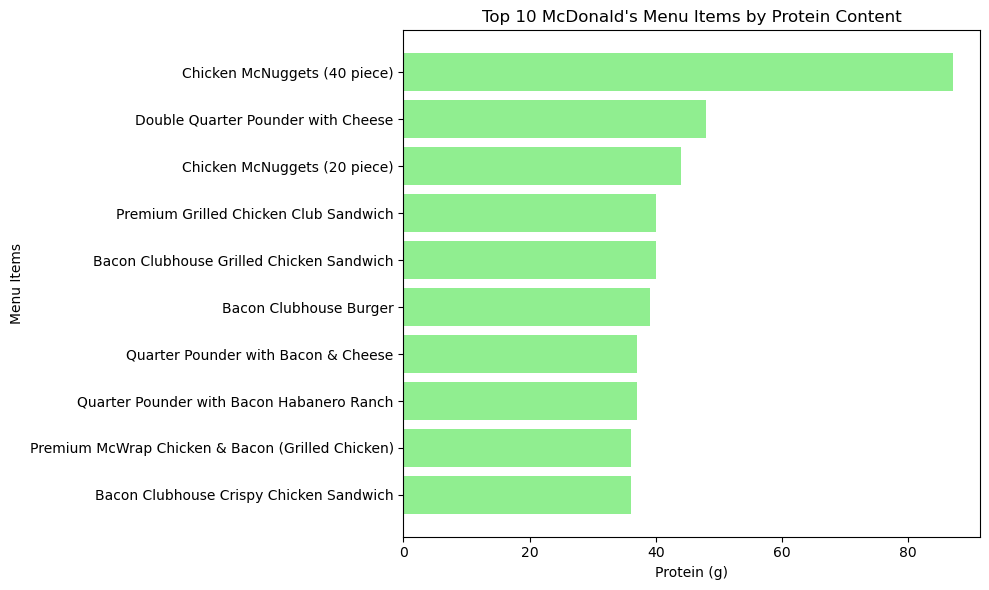

In [39]:
# Top 10 items by Protein
df_top10_protein = df.sort_values('Protein', ascending=False).head(10)

# Plot a bar chart for the top 10 items by Protein content
plt.figure(figsize=(10,6))
plt.barh(df_top10_protein['Item'], df_top10_protein['Protein'], color='lightgreen')
plt.title('Top 10 McDonald\'s Menu Items by Protein Content')
plt.xlabel('Protein (g)')
plt.ylabel('Menu Items')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


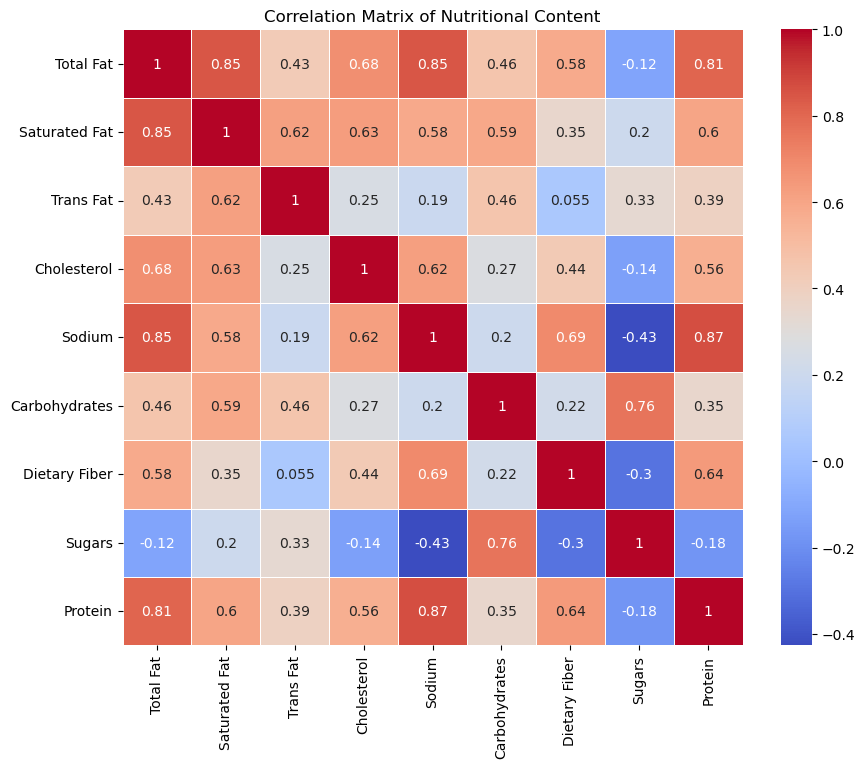

In [41]:
# Calculate the correlation matrix for the nutritional columns
corr_matrix = df[nutritional_columns].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Nutritional Content')
plt.show()


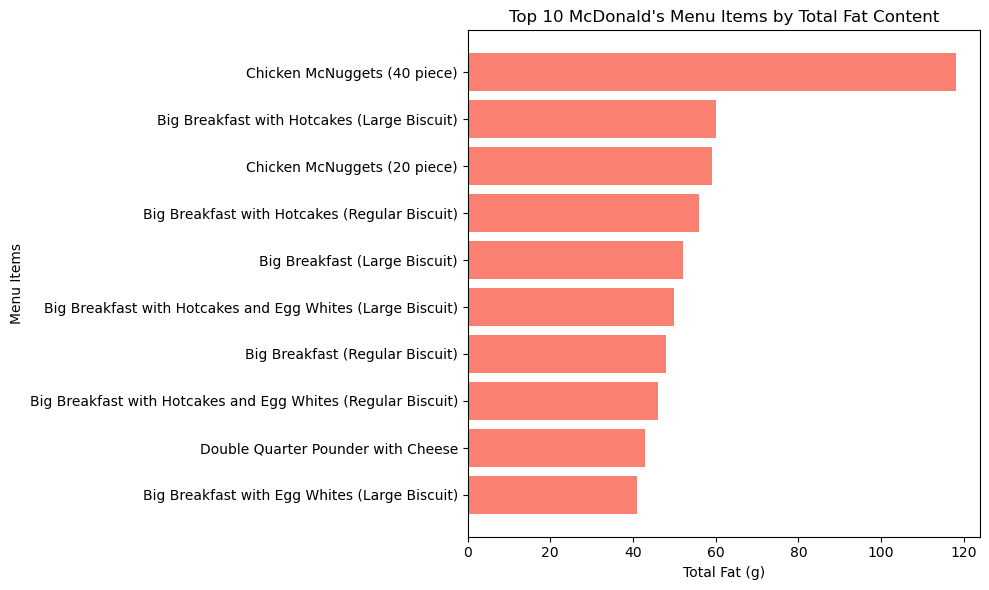

In [45]:
# Sort by Total Fat and display the top 10
df_top10_fat = df.sort_values('Total Fat', ascending=False).head(10)

# Plot bar chart for Total Fat
plt.figure(figsize=(10,6))
plt.barh(df_top10_fat['Item'], df_top10_fat['Total Fat'], color='salmon')
plt.title('Top 10 McDonald\'s Menu Items by Total Fat Content')
plt.xlabel('Total Fat (g)')
plt.ylabel('Menu Items')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


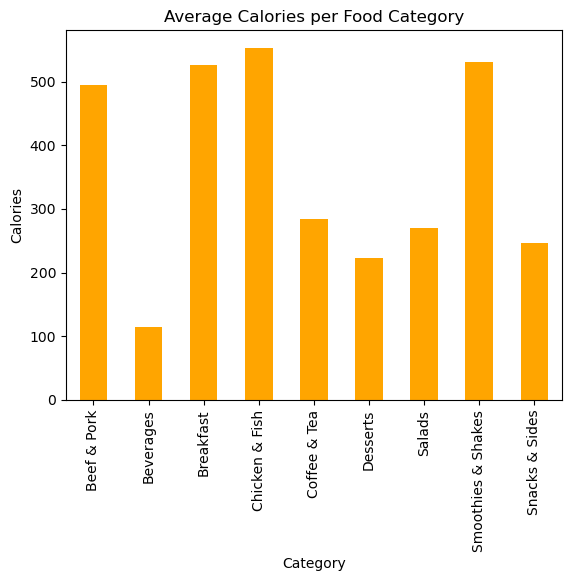

In [47]:
# Assuming 'Category' is a column in the dataset indicating food category
df.groupby('Category')['Calories'].mean().plot(kind='bar', color='orange')
plt.title('Average Calories per Food Category')
plt.ylabel('Calories')
plt.show()


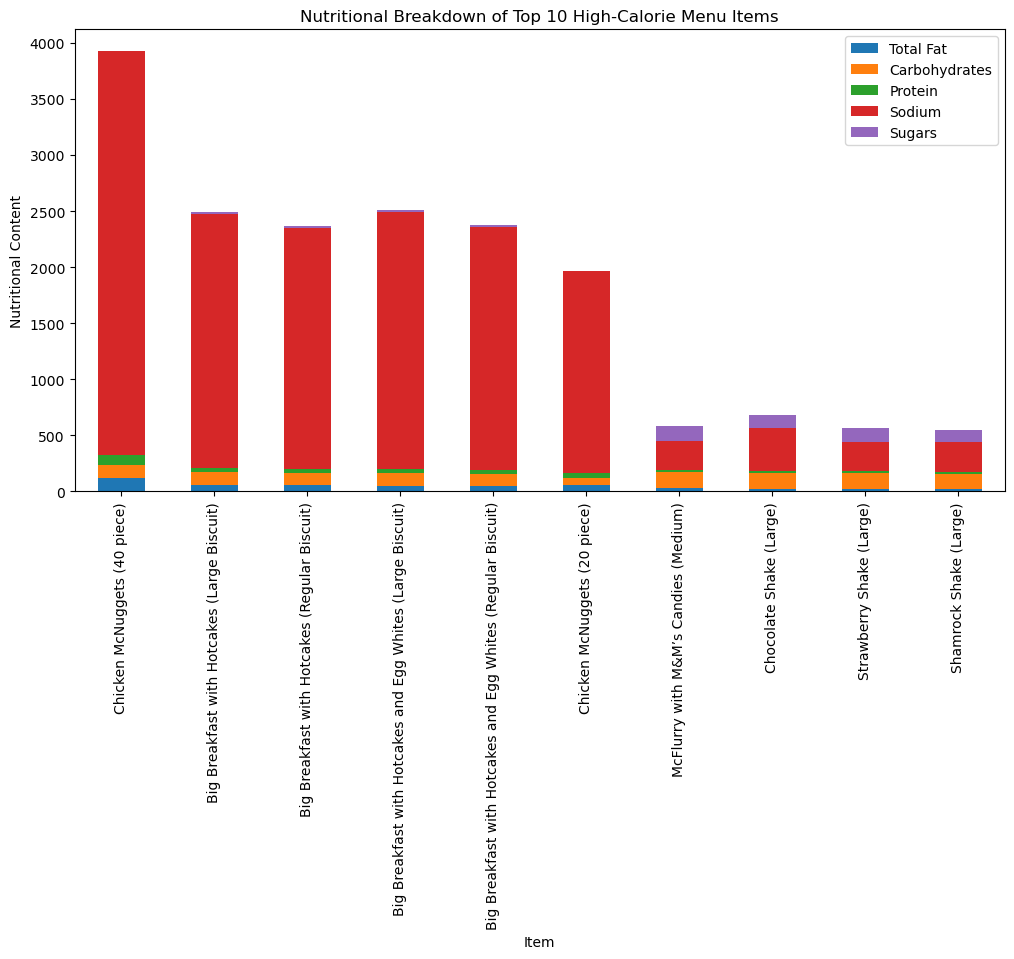

In [49]:
df_top10 = df.sort_values('Calories', ascending=False).head(10)
df_top10.plot(kind='bar', x='Item', stacked=True, y=['Total Fat', 'Carbohydrates', 'Protein', 'Sodium', 'Sugars'], figsize=(12,6))
plt.title('Nutritional Breakdown of Top 10 High-Calorie Menu Items')
plt.ylabel('Nutritional Content')
plt.show()


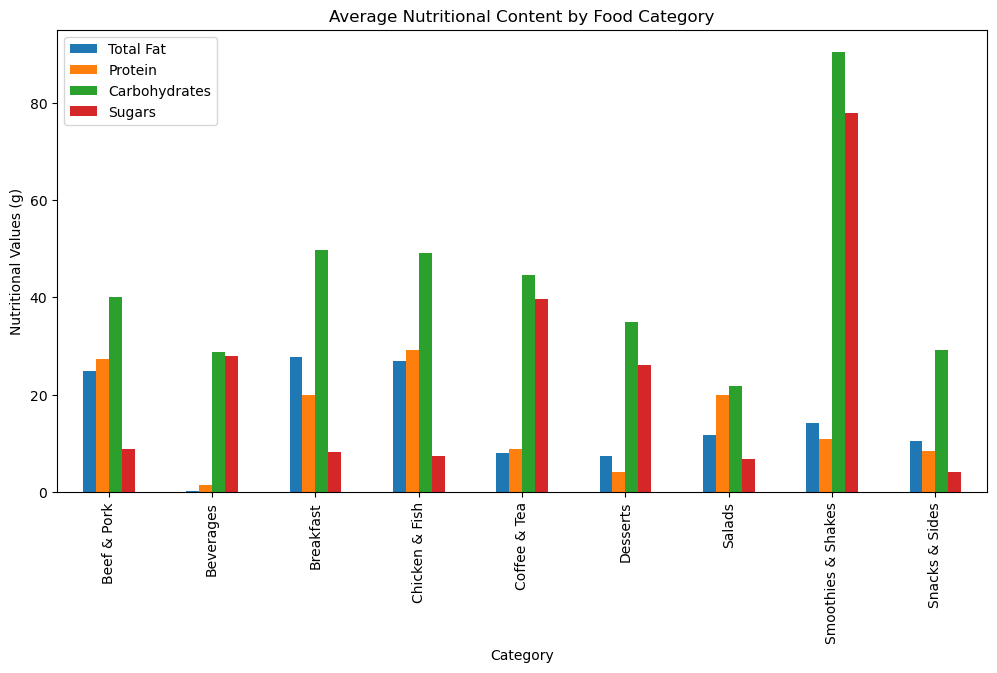

In [51]:
df.groupby('Category')[['Total Fat', 'Protein', 'Carbohydrates', 'Sugars']].mean().plot(kind='bar', figsize=(12,6))
plt.title('Average Nutritional Content by Food Category')
plt.ylabel('Nutritional Values (g)')
plt.show()


In [53]:
# Menu item with highest calorie count
highest_calories = df.loc[df['Calories'].idxmax()]
print("Menu item with highest calories:\n", highest_calories[['Item', 'Calories']])

# Menu item with lowest calorie count
lowest_calories = df.loc[df['Calories'].idxmin()]
print("Menu item with lowest calories:\n", lowest_calories[['Item', 'Calories']])



Menu item with highest calories:
 Item        Chicken McNuggets (40 piece)
Calories                            1880
Name: 82, dtype: object
Menu item with lowest calories:
 Item        Diet Coke (Small)
Calories                    0
Name: 114, dtype: object


In [61]:
# Group by Category and calculate the mean for all distinct categories
category_nutrition = df.groupby('Category')[['Calories', 'Total Fat', 'Carbohydrates', 'Protein', 'Sugars', 'Sodium']].mean()

# Display the results
print(category_nutrition)



                      Calories  Total Fat  Carbohydrates    Protein  \
Category                                                              
Beef & Pork         494.000000  24.866667      40.133333  27.333333   
Beverages           113.703704   0.092593      28.814815   1.333333   
Breakfast           526.666667  27.690476      49.761905  19.857143   
Chicken & Fish      552.962963  26.962963      49.074074  29.111111   
Coffee & Tea        283.894737   8.021053      44.526316   8.863158   
Desserts            222.142857   7.357143      34.857143   4.000000   
Salads              270.000000  11.750000      21.666667  19.833333   
Smoothies & Shakes  531.428571  14.125000      90.428571  10.857143   
Snacks & Sides      245.769231  10.538462      29.153846   8.384615   

                       Sugars       Sodium  
Category                                    
Beef & Pork          8.800000  1020.666667  
Beverages           27.851852    41.481481  
Breakfast            8.261905  1211.07